In [ ]:
!unzip dlschool-main.zip

In [ ]:
%cd dlschool-main/
!pwd

# 1. 손실 함수
- 딥러닝 학습에서 가장 많이 쓰이는 손실 함수는 MSE, CE
- MSE는 주로 regression에 활용되며 수식은 $MSE=\frac{1}{2}\sum_k{(y_k-t_k)^2}$
- CE는 주로 classification에 활용되며 수식은 $CE=-\sum_k{t_{k}logy_k}$

## MSE

In [1]:
import numpy as np

def mean_squared_error(y, t):
    return 1/2*np.sum((y-t)**2)

In [2]:
# 정답이 완전히 틀렸을 때
y = np.array([0, 0, 0, 1, 0])
t = np.array([0, 0, 1, 0, 0])

mean_squared_error(y, t)

1.0

In [3]:
# 반을 맞췄을 때
y = np.array([0, 0, 0.5, 0.5, 0])
t = np.array([0, 0, 1, 0, 0])

mean_squared_error(y, t)

0.25

In [4]:
# 정답을 맞췄을 때
y = np.array([0, 0, 1, 0, 0])
t = np.array([0, 0, 1, 0, 0])

mean_squared_error(y, t)

0.0

## CE

In [5]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [6]:
y = np.array([0, 0, 0, 1, 0])
t = np.array([0, 0, 1, 0, 0])

cross_entropy_error(y, t)

16.11809565095832

In [7]:
y = np.array([0, 0, 0.9, 0.1, 0])
t = np.array([0, 0, 1, 0, 0])

cross_entropy_error(y, t)

0.1053604045467214

In [8]:
y = np.array([0, 0, 1, 0, 0])
t = np.array([0, 0, 1, 0, 0])

cross_entropy_error(y, t)

-9.999999505838704e-08

## 2. 미니배치 학습
### 데이터 불러오기

In [ ]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)

### 랜덤으로 데이터 선정
- 배치 사이즈는 내가 한번에 학습시킬 데이터의 양을 의미
- 총 60000장의 데이터 인덱스 0~59999 중에 랜덤으로 배치 사이즈 만큼의 인덱스를 추출
- np.random.choice(데이터 수, 배치 사이즈) -> 배치 사이즈 만큼의 랜덤 인덱스 추출

In [ ]:
data_num = 60000
batch_size = 3
batch_mask = np.random.choice(data_num, batch_size)
print(batch_mask)

[43716 37616 21279]


In [ ]:
x_train[batch_mask]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
t_train[batch_mask]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### 배치용 CE 구현
- 1개의 CE를 계산하는 것이 아닌 배치 사이즈 만큼의 데이터로 한번에 CE를 계산한 에러를 평균

In [ ]:
def cross_entropy_error(y, t):
    delta = 1e-7
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y+delta)) / batch_size

In [ ]:
# 정답을 그대로 넣어서 결과 확인
cross_entropy_error(t_train[batch_mask], t_train[batch_mask])

-9.999999505838706e-08

## 3. 미분
- 수치 미분과 미분 값의 근사 확인
- $y=x^2$ 이라는 수식이 있을 때
- $x$에 대한 미분은 $\frac{dy}{dx}=2x$

In [9]:
def function_1(x):
    return x**2

In [10]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

In [11]:
def function_diff(x):
    return 2*x

In [12]:
numerical_diff(function_1, 2)

4.000000000004

In [13]:
function_diff(2)

4

### 편미분
- 변수가 여러 개인 함수에 대한 미분으로 특정 변수에 대해 미분 수행
- $f(x_o, x_1)=x_0^2+x_1^2$
- $x_0$에 대해 미분, $x_1$에 대해 미분

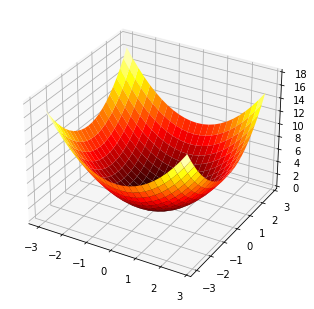

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
X = np.arange(-3, 3, 0.25)
Y = np.arange(-3, 3, 0.25)
XX, YY = np.meshgrid(X, Y)
ZZ = XX**2 + YY**2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(XX, YY, ZZ, rstride=1, cstride=1, cmap='hot');

In [15]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [16]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [17]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 4. 기울기(Gradient)
- 앞서 배운 편미분을 벡터 형태로 정리
- $gradient = (\frac{\partial{f}}{\partial{x_0}}, \frac{\partial{f}}{\partial{x_1}})$

In [18]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) 
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [19]:
_numerical_gradient_no_batch(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [20]:
_numerical_gradient_no_batch(function_2, np.array([0.0, 2.0]))

array([0., 4.])

### 경사 하강법(Gradient descent)
- 손실함수가 최소값이 될 때까지 매개변수를 조정해 나가는 방법
- $x_0=x_0-l\frac{\partial{f}}{\partial{x_0}}$
- $x_1=x_1-l\frac{\partial{f}}{\partial{x_1}}$

In [21]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        if i%10 == 0:
          print(x)
    return x



### 간단 예제
- $y=x^2$ 의 최소값을 나타내는 $x$ 값을 찾아보자

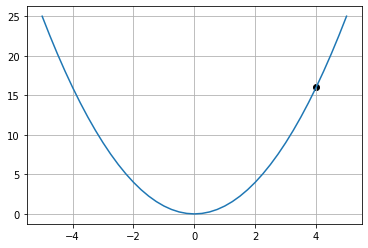

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
X = np.arange(-5, 5.1, 0.25)
Y = X**2

plt.figure()
plt.plot(X, Y)
plt.grid()
plt.scatter(4, 16, c='k')
plt.show()

In [23]:
gradient_descent(function_1, np.array([5.0]), lr=0.02, step_num=100)

[4.8]
[3.19119665]
[2.12161168]
[1.41051669]
[0.93775753]
[0.62345181]
[0.41449111]
[0.27556722]
[0.18320608]
[0.12180138]


array([0.0843516])

In [24]:
def view_gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    view_res = []
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x = x - lr * grad
        if i%10 == 0:
            view_res.append(x[0])
    return np.array(view_res)

view_res = view_gradient_descent(function_1, np.array([4.0]), lr=0.01, step_num=150)

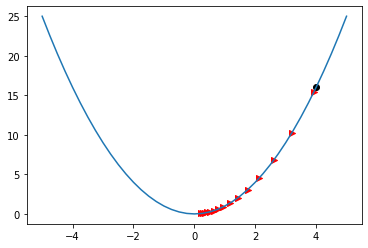

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
X = np.arange(-5, 5.1, 0.25)
Y = X**2

plt.figure()
plt.plot(X, Y)
plt.scatter(4, 16, c='k')
plt.scatter(view_res, view_res**2, marker='>', c='r')
plt.show()


## 5. 신경망에서의 기울기

In [26]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [27]:
net = simpleNet()

In [28]:
x = np.array([1, 2])
print(x)

[1 2]


In [29]:
print(net.W)

[[-1.72608433  1.80967523 -1.46307352]
 [-1.10986378 -1.30952801 -0.17694174]]


In [30]:
p = net.predict(x)
print(p)

[-3.94581188 -0.8093808  -1.816957  ]


In [31]:
t = np.array([1, 0, 0]) # 정답 레이블
net.loss(x,t)

3.4789818191000346

In [32]:
def f(W):
    return net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[-0.96915816  0.70995249  0.25920567]
 [-1.93831633  1.41990498  0.51841135]]


## 6. 학습 알고리즘(MNIST) - 도전
- 1단계: 미니배치
- 2단계: 기울기 산출
- 3단계: 매개변수 갱신
- 4단계: 반복

In [33]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

class TwoLayerNet:
    # 가중치 초기화
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [35]:
import numpy as np
from dataset.mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 2000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 256   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
view_iter = 200

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 경과 기록 확인 
    if i % view_iter == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f"train acc = {str(round(train_acc*100, 1))}% | test acc = {str(round(test_acc*100, 1))}%")

3

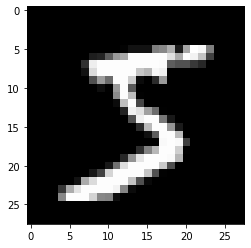

In [36]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0].reshape((28,28)), cmap='gray')
np.argmax(network.predict(x_train[:1]))

0

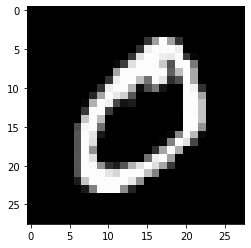

In [37]:
plt.imshow(x_train[1].reshape((28,28)), cmap='gray')
np.argmax(network.predict(x_train[1:2]))

4

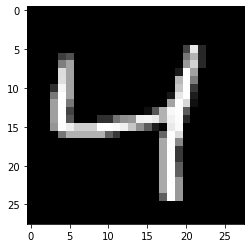

In [38]:
plt.imshow(x_train[2].reshape((28,28)), cmap='gray')
np.argmax(network.predict(x_train[2:3]))

In [1]:
import numpy as np
from dataset.mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)